In [1]:
from matplotlib import pyplot as plt 
from LSTM_Model import Model
import pickle
import numpy as np
from scipy import sparse
from math import log
import pickle 

units = 1
num_features = 3

total_data = []

cell = Model(units, num_features)

# Load an Old Model 

if an old model has been stored this code block loads it and initilizes the LSTM cell with the wieghts of that model.

In [3]:
with open("model_V1.pkl" , 'rb') as file:
    stored_cell = pickle.load(file)
    
cell.load_pickle(stored_cell)

# Train The Model 

This section is used to load the data and train the model. 

This function parses the data from a given pickle file and returns the values stored inside it

In [2]:
def parse_data(filename):
    h, ene = [], []
    with (open(filename, "rb")) as openfile:
        while True:
            try:
                data = pickle.load(openfile)
            except EOFError:
                break

    random.shuffle(data)
    h, ene, margin= list(zip(*data))
    
    h = np.array(h)
    
    print(h.shape)
    
    return h, ene, margin

This routine is designed to cycle through the input files and parse the data contained within them. The output of this block also shows the input distribution of each of the files.

(490,)
pickle/C2_V1.pkl


/tmp/ipykernel_1803/1245152696.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  h = np.array(h)


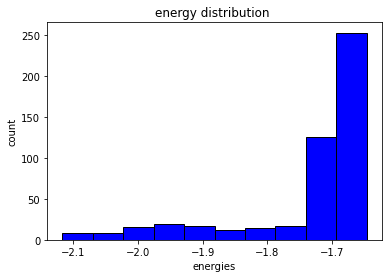

(490, 36, 3)
pickle/H2_V1.pkl


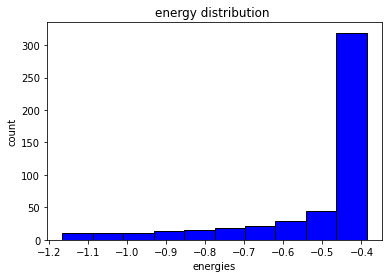

(490, 195, 3)
pickle/LiH_V3.pkl


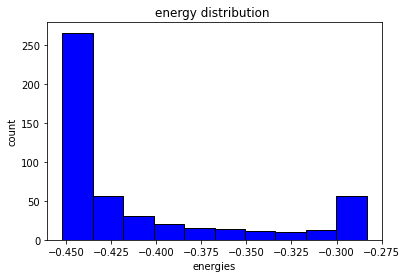

(490,)
pickle/HO-_V1.pkl


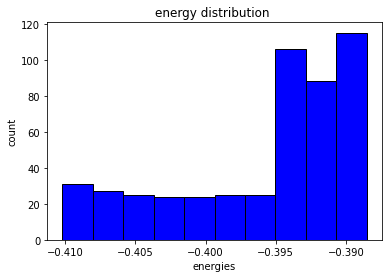

(490,)
pickle/FLi_V1.pkl


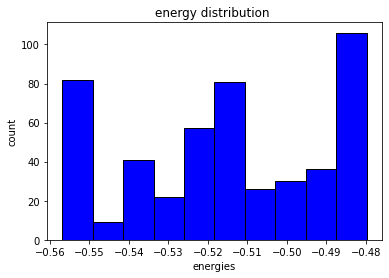

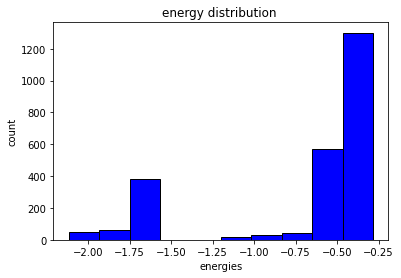

2450


In [11]:
import random
from LSTM_Model import Model
import pickle
import numpy as np
from scipy import sparse

random.seed(7)

total_data = []
train_data = []

input_data_files = ["pickle/C2_V1.pkl", 
                    "pickle/H2_V1.pkl",
                    "pickle/LiH_V3.pkl", 
                    "pickle/HO-_V1.pkl", 
                    "pickle/FLi_V1.pkl"]

for file in input_data_files:
    h, ene, _ = parse_data(file)
    total_data.extend(ene)
    train_data.extend(list(zip(h, ene)))


    import matplotlib.pyplot as plt 
    print(file)
    plt.hist(ene, color = 'blue', edgecolor = 'black')
    plt.title('energy distribution ')
    plt.xlabel('energies')
    plt.ylabel('count')
    plt.show()



plt.hist(total_data, color = 'blue', edgecolor = 'black')
plt.title('energy distribution ')
plt.xlabel('energies')
plt.ylabel('count')
plt.show()

print(len(total_data))
# total data : 2548

This step uses the input files parsed by the preceding block to train the model.

The training batch size and the number of epochs can be specified in this block.

In [12]:
batch_size = 5
epochs = 1

for i in range(epochs):
    
    print()
    print()
    print("__________________________ epoch",  (i+1), "/", epochs, "__________________________ ")
    print()
    print()
    
    random.shuffle(train_data)
    X_train, Y_train = list(zip(*train_data))
    cell.train(X_train, Y_train, batch_size, learning_rate=0.01, add_noise=True)
    print("done!")



__________________________ epoch 1 / 1 __________________________ 



-----------------------------  batch :  0 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.47624011789077136, -0.448935761994119), (-0.4768096684420829, -0.3173152151412779), (-0.4769040873433334, -0.3083393394230569), (-0.4924009172907784, -0.38960029495417814), (-0.475981314651293, -0.5567915213462555)]
average Loss:  -0.0754707945518743
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.8658713342488844, -0.4517838836503998), (-0.8670448258410657, -0.32556264386514044), (-0.8654439955308689, -0.47985539435362057), (-0.8989789099464588, -0.391774817713312), (-0.8885947049121306, -0.3867618294734373)]
average Loss:  -0.4700390402846996
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progres

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.7954315986219512, -0.3889376324282381), (-0.8255612644973458, -0.5869618339951852), (-0.8097670466641189, -0.4020420301183947), (-0.8305599110998199, -0.39285898730555857), (-0.7899014958392246, -1.6813766012819826)]
average Loss:  -0.11980884631862028
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  15 / 490 -----------------------------

Prog

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.6083703708628474, -0.3975562760354876), (-0.6214399358822906, -0.4077009031255301), (-0.5613377260151055, -1.8272725985456475), (-0.5617541306413782, -2.005922231397932), (-0.5898474371201912, -0.5566741229799277)]
average Loss:  0.4504753063125424
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  22 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress

Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.6272206171049244, -1.660514824654939), (-0.6364839778471679, -0.39244668863682364), (-0.6236732674548445, -0.45004856277439576), (-0.6411187129211545, -0.39633550792969174), (-0.6249166565184314, -1.692536784638179)]
average Loss:  0.28769382735750126
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  29 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progr

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  36 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.5293873944041135, -0.45188265898969426), (-0.5316206826661317, -1.6678413202922258), (-0.562227685922359, -0.407779021102442

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  43 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.6159376346312191, -1.714816608186723), (-0.6201640533348044, -1.6598605745099917), (-0.6182379602270447, -0.4314416247019919), (-0.6173793550503179, -0.49401642093647524), (-0.6174051980816171, -0.491509

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  50 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.5931356282350811, -0.3941667224940488), (-0.5385505737227878, -1.7028208564411074), (-0.5390995494522202, -0.45187815311069723), (-0.5752403658092, -0.39081626791205015), (-0.5940845939296855, -0.3900993440088456)]
average Loss:  0.09793412656355491
adjusting the weights...
Progres

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  57 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.5945081554210967, -0.4075234350831287), (-0.5729113799618462, -0.3959067444998823), (-0.5933982581868568, -0.3982473981162916), (-0.5537202331949855, -0.45064046550882786), (-0.6034300645175498, -0.6106883185477424)]
average Loss:  -0.1309923459052924
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progr

Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  64 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.6289132310748294, -0.36147984910797426), (-0.6424928370138799, -0.3918597670504056), (-0.6270284400589237, -1.7125166611643579), (-0.6284306152143682, -0.4518599023835952), (-0.6681045803946563, -0.39016448260057757)]
average Loss:  0.022582191710050603
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Pro

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.4359266649495108, -0.5214584673637717), (-0.4586411005674093, -1.6625210580802872), (-0.4587167204284068, -1.661176242663288), (-0.4841070897599443, -0.3917999289960439), (-0.48348141868283867, -0.4074645420537024)]
average Loss:  0.4647094489537967
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress:

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.5137819606539131, -0.5559553210492254), (-0.5142578784407882, -1.6804714506802583), (-0.5153679654200579, -1.6563853358553757), (-0.537585384140105, -0.40960435308230103), (-0.5287659200683162, -0.40041856095886885)]
average Loss:  0.41861518258056973
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.4233657517515414, -0.3340141031348338), (-0.41855962338539726, -1.765347582293316), (-0.4343794987988244, -0.39888944642122226), (-0.4166226515201913, -2.046790390800112), (-0.44321006493491255, -0.4110490625576264)]
average Loss:  0.5639905989632487
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  86 / 490 -----------------------------

Progre

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.4921247697209968, -0.4358293191124254), (-0.49176515968263174, -0.5567476037549426), (-0.5099059110716309, -0.39051549854114853), (-0.49191863860434487, -0.45051097714512345), (-0.48241496694202696, -0.5139975590797405)]
average Loss:  -0.02410569767765014
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  93 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete


Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.49563940794550604, -0.5567615375612434), (-0.4955150733492197, -1.7092256481118397), (-0.4956118465535672, -1.6875874646418652), (-0.49564657487129005, -0.4942522268864593), (-0.49563275388361666, -0.5074300712427231)]
average Loss:  0.4954422583681863
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  100 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Pro

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  107 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.5145192489412151, -0.512080052041668), (-0.5134994357756338, -0.45130546895689605), (-0.5116588709105536, -0.39311297471392

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  114 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.5264014546024561, -0.5366951691465118), (-0.5007997457692852, -0.3921282085997433), (-0.5156057925187314, -0.4921760987845829), (-0.5430349566657969, -1.9267605849538114), (-0.5155544535459226, -0.45028

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  121 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.4621166227206902, -1.705769915440186), (-0.4450414661610274, -0.38635336631959505), (-0.4789701687730118, -0.539099558128072), (-0.46123691980298914, -1.682991371762185), (-0.4613616060638143, -0.5568216236009107)]
average Loss:  0.5124618103458832
adjusting the weights...
Progres

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  128 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.5689283192066866, -0.39070791160530405), (-0.5828228125646722, -0.4013210900635471), (-0.5950756507363066, -0.48013234265266647), (-0.5945419078497598, -0.4518051761336688), (-0.5782239156337959, -0.39229649759466234)]
average Loss:  -0.16066591758827448
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
P

Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  135 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.46155597863156844, -0.3864409958692758), (-0.47219964619901855, -1.660023471395391), (-0.453866985616809, -0.9350093381186599), (-0.45926440008322655, -0.4173427995890089), (-0.4725006013505577, -0.45189067274589245)]
average Loss:  0.3062639331674096
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Prog

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.4892133225499157, -0.4864055826335232), (-0.48934249406164826, -1.6851279844770062), (-0.4731032414758718, -0.5274408938832431), (-0.48790827599275016, -0.2842169880127725), (-0.48903943737506145, -0.45181013715356144)]
average Loss:  0.20127896294097183
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Prog

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.5364624553455748, -0.42674056901554636), (-0.5297676673242259, -0.40150149429285875), (-0.5462203433876242, -0.5213321139452489), (-0.536526301717166, -1.6771842471389249), (-0.535831039712248, -0.30564080829219975)]
average Loss:  0.12951828503958798
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.5667678905576137, -0.3879613439815208), (-0.5744857280971677, -0.42484038640586785), (-0.584733362600144, -0.5532799110718258), (-0.5662724167581561, -0.3956416923649093), (-0.5649504287103678, -0.47850079300671033)]
average Loss:  -0.12339713997852302
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  157 / 490 -----------------------------

Pro

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.5099840392764955, -0.38657686583077044), (-0.5123571690041692, -0.3929001525014826), (-0.5089491960674459, -0.523206816320627), (-0.5136750880649044, -0.5566504833137742), (-0.5081598093776151, -0.8736787775970769)]
average Loss:  0.035977558754620234
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  164 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Prog

Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.48364680332681315, -0.44812059201343946), (-0.48364479713082864, -0.4443546701055894), (-0.48083695652582464, -0.3916578274171343), (-0.48105866074110154, -0.41620232391135914), (-0.48365580787485696, -1.7324516101399183)]
average Loss:  0.20398879959760313
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  171 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complet

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  178 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.4630112969818655, -0.38732661392397016), (-0.46679182679061765, -1.7176180388686078), (-0.46903427389912733, -0.51264747298

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  185 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.5955478669833769, -0.6683575107784867), (-0.5971362131349148, -0.4618532584286087), (-0.6014237470165053, -0.403028288429951), (-0.6018995022692831, -0.4016818034855305), (-0.6079491633267518, -0.443931

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  192 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.4430423922740852, -1.663033077945002), (-0.4485233229604068, -0.5163358603641086), (-0.43601991490688624, -0.40181029070473406), (-0.44349565457472695, -0.49107325307984695), (-0.4428200558977929, -1.6468156671949856)]
average Loss:  0.5010333617349558
adjusting the weights...
Pro

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  199 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.510159624070754, -0.401140617191146), (-0.5060079770493752, -0.4310963496919741), (-0.5063665582676659, -0.4071165720961508), (-0.515028258372503, -0.48728521019704374), (-0.5149325572250526, -0.45188633905948183)]
average Loss:  -0.07479397734991082
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progr

Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  206 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.49842311664680516, -1.7681606978405142), (-0.48252695968556886, -1.6616770809994392), (-0.4831155643642944, -0.45176942397912345), (-0.46978430274650995, -0.42648788610991717), (-0.46520694310501015, -0.3897219467501003)]
average Loss:  0.45975202982618113
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.4630311803840288, -0.4484959191613793), (-0.4623802454006892, -0.3157360588327496), (-0.4634303204405514, -1.6970275699918318), (-0.4630600571177729, -0.3827937149717293), (-0.4465437768737859, -0.6468247233013165)]
average Loss:  0.23848648120843566
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.46245474443903223, -0.4085402849177058), (-0.482179573812916, -0.47995896231942936), (-0.4821392491862361, -1.6896248819735291), (-0.48144297487354204, -1.6726431353916382), (-0.4814768196011316, -0.44274149742153845)]
average Loss:  0.46076308002219657
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

----

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.5513066782627527, -0.5320429403941915), (-0.4761190009266437, -0.39321805373117513), (-0.5233553982342458, -0.41282236726069677), (-0.5513462731555586, -0.5129868295502007), (-0.5223849734685092, -1.6570021393790029)]
average Loss:  0.1767120012535114
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  228 / 490 -----------------------------

Prog

Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.42220445386562055, -0.3895993262698738), (-0.4361159178114019, -0.40376292433332694), (-0.4647794108830818, -0.5568003093754896), (-0.4392334033019876, -0.38693174107348005), (-0.4642376510195255, -0.45161851538578723)]
average Loss:  -0.007571604088731943
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  235 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  242 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.4720093739455551, -0.3866132476880466), (-0.5000339832439552, -0.4503313438787613), (-0.5003649664833285, -0.48075604790416

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  249 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.4839948684679935, -0.4994015077053291), (-0.48410578950475497, -0.5568019961253299), (-0.483275967564151, -1.6653021406047088), (-0.48317740484049065, -0.45086014044816913), (-0.48390443159629554, -0.48

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  256 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.4257751037685653, -0.513072146821568), (-0.4704756945946919, -0.36634237747614673), (-0.47066458731180955, -0.4512849847502931), (-0.47141291129321744, -0.5567019911300832), (-0.4310675469382983, -0.41456260033161574)]
average Loss:  0.006513651320624858
adjusting the weights...
P

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  263 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.5447267614309034, -0.546087581821368), (-0.43557551303139813, -0.39414454362635354), (-0.5449085727735334, -0.5368688077978732), (-0.5019865789164208, -0.44227279213477466), (-0.5020627760752253, -0.4480234866571182)]
average Loss:  -0.03237259803799871
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Pr

Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  270 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.5106428119539951, -1.7412275723838775), (-0.46339292090835754, -0.450000046680179), (-0.4626486041212106, -0.44949730752367856), (-0.4643073798492184, -1.6798006978722526), (-0.4225828751517574, -0.4086878782811567)]
average Loss:  0.48112778215132107
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Prog

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.4803342132392452, -0.29117412140130305), (-0.48356351373240847, -0.4296123097853135), (-0.4827395494247093, -1.6495976162141375), (-0.4870631044596652, -1.698798725255159), (-0.48472543606895724, -0.4815484690352889)]
average Loss:  0.4264610849532433
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progres

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.5337179878737732, -0.5567868326220236), (-0.506020758574077, -0.39817582106435623), (-0.49219510743114386, -0.38634703690765715), (-0.5337347317909774, -0.49990369705193416), (-0.5379098753993339, -1.7180293178693802)]
average Loss:  0.19113284888920917
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

----

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.4803525490267328, -0.3885160022819747), (-0.48804418865341914, -1.6601868108535314), (-0.4912035606853079, -1.6973192652537676), (-0.44370080673986695, -0.4533863237019491), (-0.45342037494151066, -0.3864236174498449)]
average Loss:  0.445822107898846
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  292 / 490 -----------------------------

Prog

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.4103772406604958, -0.3946314676020677), (-0.467016605785339, -1.668212514909385), (-0.4663651674300234, -0.44709025531606095), (-0.4247274376601813, -0.44679521566551683), (-0.5045499789010534, -1.9676161724204775)]
average Loss:  0.530261839095283
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  299 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progres

Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.49121646952699033, -0.39207741267087215), (-0.5066834239428127, -1.6822944395736243), (-0.4949825582339616, -0.3896794601703988), (-0.5416849594402664, -0.5134852185052239), (-0.505333775574433, -0.45155392622300106)]
average Loss:  0.17783785408493127
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  306 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Pro

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  313 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.4410478505692091, -0.409999781848569), (-0.49400041796489697, -0.45150408236997297), (-0.5394108915129523, -0.5114891052581

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  320 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.543969583310546, -1.7464069061037293), (-0.48057214651098784, -0.3914336291692564), (-0.49679650757809046, -0.5568146792677027), (-0.4954894701112165, -0.44162815034416436), (-0.49962823318678395, -1.70

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  327 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.46569332639442923, -0.45189020330029184), (-0.4247702955521952, -0.38945134362887857), (-0.46543756825137433, -0.44999636062657355), (-0.4657133454222452, -1.665837705877081), (-0.46688844115479883, -0.47984393994549634)]
average Loss:  0.22970331532065572
adjusting the weights...

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  334 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.4675791726970925, -0.3864555819820936), (-0.5450616711391549, -1.7214769276291122), (-0.5472817274339673, -0.5356376603062785), (-0.449712419171894, -0.6169488150465781), (-0.5080076300697088, -0.4924012897733121)]
average Loss:  0.24705553084511137
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progre

Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  341 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.525016327560844, -0.5173846561608002), (-0.5288756165840416, -1.9158564639029692), (-0.43208553439913866, -0.3940753041057121), (-0.4920173546587241, -1.682063770173798), (-0.5250721628828092, -0.5206624070966654)]
average Loss:  0.5053951210708775
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progres

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.5503910002628726, -0.503679491945789), (-0.5491773695162716, -0.43384484435386206), (-0.48296793852562114, -0.38959030880350554), (-0.5504861200139795, -0.5566881712838097), (-0.5878685749927588, -0.5404015608429518)]
average Loss:  -0.05933732521631711
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progr

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.5039676200561454, -0.3903605549819815), (-0.491732256215713, -0.39924801718230185), (-0.46139265991125683, -0.7980956008768652), (-0.5138552878400207, -0.4482163861009951), (-0.5476674544291005, -0.5148343588109299)]
average Loss:  0.0064279279001674405
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

----

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.5249990066617436, -1.8632370038979502), (-0.4943209766510707, -0.5567346378456364), (-0.4970550606136085, -1.7071283926828755), (-0.4934914677190827, -0.4506567688994245), (-0.5249943332584994, -1.867039435081523)]
average Loss:  0.781987078700681
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  363 / 490 -----------------------------

Progress

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.47214296620824475, -0.33732229268914704), (-0.4739147717056024, -0.4829161039647829), (-0.5034295633595823, -0.521460268900725), (-0.4730447442388202, -0.4461705277319803), (-0.47471493670715753, -1.6730431505940686)]
average Loss:  0.21273307233225935
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  370 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Pro

Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.428519671066793, -0.498141065625807), (-0.5018855924166897, -0.513612280693124), (-0.47086615115086833, -0.5091679166135492), (-0.4396555003160803, -0.3863787447257321), (-0.47138061962212785, -0.48069601662677997)]
average Loss:  0.015137697942486617
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  377 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Prog

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  384 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.399028792584575, -0.38962112834160223), (-0.44136782968630495, -0.38956083204890035), (-0.44881823992139536, -0.45132101611

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  391 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.43127862805145534, -1.0408039023785731), (-0.4865986287475321, -0.38858625418690895), (-0.458618429568137, -0.403916480384936), (-0.4545930069174574, -0.40657430878967205), (-0.44907433559778653, -0.409

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  398 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.49059244010833114, -0.39719169563154466), (-0.4934692955793186, -1.698202684255179), (-0.48776123772572166, -0.2904302197828299), (-0.4904931868886752, -0.44971878477938443), (-0.47324849094231836, -0.3968553277493072)]
average Loss:  0.15936681219077606
adjusting the weights...
P

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  405 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.4404313936122229, -0.39269532177637445), (-0.475108675848837, -0.450923245644109), (-0.4753899095977723, -0.4854183675599302), (-0.42826767769111185, -0.6720772069879505), (-0.47609417949918115, -1.6780448531507801)]
average Loss:  0.2767734317740038
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progr

Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  412 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.49508850695525136, -0.5131486815026562), (-0.49538850060478673, -0.5151559371373651), (-0.46432786903152923, -0.2878249325839448), (-0.4661412202044704, -1.6548714231545603), (-0.41808986399555725, -0.39101884472584914)]
average Loss:  0.20459677166255613
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete


Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.4798372215609581, -1.7293714658813428), (-0.4405495076113248, -0.4726363876884041), (-0.44705848630068257, -0.38788135819710257), (-0.5026081486961884, -0.5130974584674419), (-0.4762752014027457, -0.40100621851831875)]
average Loss:  0.23153286463614214
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progr

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.5066750696161842, -0.3935799035005232), (-0.5492678600405668, -0.44901984271940076), (-0.5493224288888855, -0.45081111068676627), (-0.5111161308722589, -0.6646757123946361), (-0.5741751876445909, -0.5257796656324132)]
average Loss:  -0.041338088425749375
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

---

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.38359090437513, -0.3896099152914303), (-0.38743860918196377, -0.7283197971006485), (-0.4199462267263165, -0.44129738618190917), (-0.4494631766692123, -1.9566678855899795), (-0.3983699598718033, -0.3864716012341496)]
average Loss:  0.37271154171473825
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  434 / 490 -----------------------------

Progr

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.5831686835479618, -1.6582555619234114), (-0.5601369410598138, -0.40186199103884235), (-0.5844841655562754, -0.5567108710779678), (-0.581336664408909, -0.30071891969349185), (-0.5836839785788198, -0.44334727004914765)]
average Loss:  0.09361683612621623
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  441 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Pro

Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.4991609728870323, -0.4513896157153363), (-0.5000948646557308, -0.4800197175047316), (-0.4663807816293325, -0.45690905093884826), (-0.46508189172418624, -0.49464488472674717), (-0.4720984541649166, -0.38773147589536583)]
average Loss:  -0.026424444056033856
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  448 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  455 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.44668507798428614, -1.7136554725552315), (-0.4176029115734382, -0.3868333967032045), (-0.4036207008380593, -0.7832776621469

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  462 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.4824647965658165, -0.4822382739903901), (-0.45745348864525087, -0.40329583726203566), (-0.4459650966331289, -0.4417412372642847), (-0.48261616421284537, -1.673445640436455), (-0.4442856724367842, -0.480

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  469 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.44452964311839194, -0.3863952070639446), (-0.4271418314410966, -0.39289595212616746), (-0.4662924387096461, -0.30310006697461844), (-0.49379382812762956, -0.5431374927270838), (-0.46864730761323065, -0.45009670562108095)]
average Loss:  -0.04495592489941992
adjusting the weights..

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  476 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.4906828841581968, -0.5295973870949907), (-0.5472820514524361, -0.535588582427323), (-0.5200810482684145, -0.2843621999698138), (-0.5222969064564895, -0.4518670818571797), (-0.5237728914660628, -1.6922664811906003)]
average Loss:  0.17791319014766155
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progre

Progress: |██████████████████████████████████████████████████| 100.0% Complete

-----------------------------  batch :  483 / 490 -----------------------------

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[(-0.4820599328007453, -1.7000083995164488), (-0.47974897230403907, -1.650696242675238), (-0.48097514184810664, -0.48011620181623016), (-0.47856200170695423, -0.2833227016651598), (-0.48026459919451364, -0.4380581031800661)]
average Loss:  0.43011820019975683
adjusting the weights...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
P

# Save The Model

In [25]:
with open("model_V2.pkl" , 'wb') as file:
    stored_cell = pickle.dump(cell, file)

# Test the model

### Testing on training Data

Parsing testing data

(490, 36, 3)


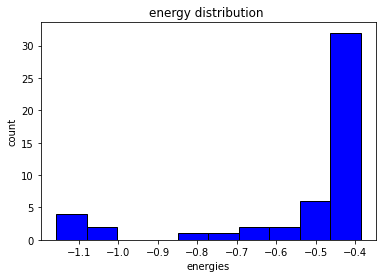

In [13]:
import random
from LSTM_Model import Model
import pickle
import numpy as np
from scipy import sparse

random.seed(7)

total_testing_data = []

input_data_files = ["pickle/H2_V1.pkl"]

for file in input_data_files:
    X_test, Y_test, margin = parse_data(file)
    X_test, Y_test, margin = X_test[:50], Y_test[:50], margin[:50]
    total_testing_data.extend(Y_test)


import matplotlib.pyplot as plt 


plt.hist(total_testing_data, color = 'blue', edgecolor = 'black')
plt.title('energy distribution ')
plt.xlabel('energies')
plt.ylabel('count')
plt.show()

generating predictions

In [14]:
error = 0
preds = []
for i in range(len(X_test)):
    pred = cell.predict(X_test[i])
    preds.append(pred)
    
    print("prediction :", (float(pred[0])),
          "| real:", (Y_test[i]), 
          "| error:", (Y_test[i] - pred[0]))
    error += (Y_test[i] - pred[0])
    
print()
print("avg error: ", (error/len(X_test)))

    

prediction : -0.4311298893699348 | real: -1.025634763248418 | error: -0.5945048738784832
prediction : -0.44392503078668283 | real: -0.3895242678199433 | error: 0.05440076296673951
prediction : -0.4444094343462515 | real: -0.38788135819710257 | error: 0.056528076149148954
prediction : -0.4435085782948634 | real: -0.3916817749544087 | error: 0.0518268033404547
prediction : -0.4427163452774146 | real: -0.3982473981162916 | error: 0.044468947161122985
prediction : -0.43635467385854915 | real: -0.6201296940544407 | error: -0.1837750201958916
prediction : -0.4431509512139192 | real: -0.39420584326896513 | error: 0.04894510794495405
prediction : -0.43896184320875875 | real: -0.4912400222890248 | error: -0.05227817908026605
prediction : -0.4456566047653651 | real: -0.38638649960098814 | error: 0.059270105164376974
prediction : -0.43887721502955834 | real: -0.49464488472674717 | error: -0.055767669697188826
prediction : -0.44584932203052996 | real: -0.3863509912324643 | error: 0.059498330798065

Plotting the results

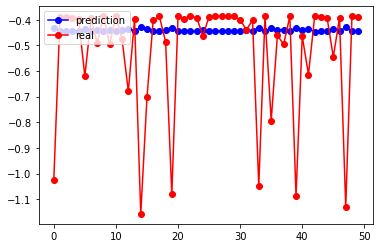

In [15]:
x = range(len(preds))

fig = plt.figure()
ax1 = fig.add_subplot(111)


ax1.plot(x, preds, c='b', marker="o", label='prediction')
ax1.plot(x, Y_test[:len(preds)], c='r', marker="o", label='real')
plt.legend(loc='upper left');
plt.show()

### Testing on New Data

Parsing the new data

(475, 36, 3)


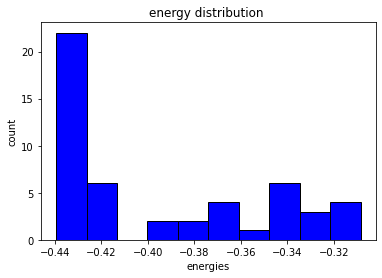

In [16]:
import random
from LSTM_Model import Model
import pickle
import numpy as np
from scipy import sparse

random.seed(7)

total_testing_data = []

input_data_files = ["pickle/O2_V1.pkl"]

for file in input_data_files:
    X_test, Y_test, margin = parse_data(file)
    X_test, Y_test, margin = X_test[:50], Y_test[:50], margin[:50]
    total_testing_data.extend(Y_test)


import matplotlib.pyplot as plt 


plt.hist(total_testing_data, color = 'blue', edgecolor = 'black')
plt.title('energy distribution ')
plt.xlabel('energies')
plt.ylabel('count')
plt.show()

Generating predictions using the new data

In [17]:
error = 0
preds = []
for i in range(len(X_test)):
    pred = cell.predict(X_test[i])
    preds.append(pred)
    
    print("prediction :", (float(pred[0])),
          "| real:", (Y_test[i]), 
          "| error:", (Y_test[i] - pred[0]))
    error += (Y_test[i] - pred[0])
    
print()
print("avg error: ", (error/len(X_test)))

    

prediction : -0.4386312803576927 | real: -0.4393080173155397 | error: -0.0006767369578469795
prediction : -0.43725682802042903 | real: -0.4390725227609664 | error: -0.001815694740537388
prediction : -0.4228924010754035 | real: -0.4183263798992556 | error: 0.004566021176147905
prediction : -0.43918098565371466 | real: -0.4394017904155021 | error: -0.0002208047617874298
prediction : -0.4385955922261008 | real: -0.43930173556393015 | error: -0.000706143337829368
prediction : -0.4362477191879212 | real: -0.31773847994597304 | error: 0.11850923924194817
prediction : -0.4378794080523083 | real: -0.4391746797918472 | error: -0.0012952717395389168
prediction : -0.4344725692576209 | real: -0.33039407446034375 | error: 0.10407849479727715
prediction : -0.4301390437102568 | real: -0.36227931293507254 | error: 0.06785973077518426
prediction : -0.43222046397940383 | real: -0.34681393508577685 | error: 0.08540652889362699
prediction : -0.4387539515118609 | real: -0.43932946617212565 | error: -0.0005

Plotting the results of the predictions 

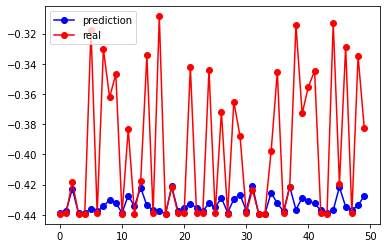

In [18]:
from matplotlib import pyplot as plt 

x = range(len(preds))

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(x, preds, c='b', marker="o", label='prediction')
ax1.plot(x, Y_test, c='r', marker="o", label='real')
plt.legend(loc='upper left');
plt.show()

# Testing on The Water Molecule


Loading the water molecular data

(49,)


/tmp/ipykernel_1803/1245152696.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  h = np.array(h)


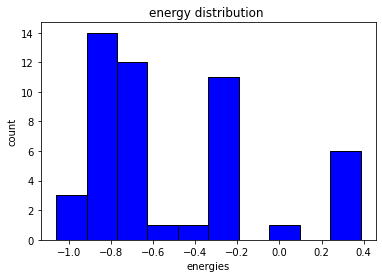

In [19]:
import random
from LSTM_Model import Model
import pickle
import numpy as np
from scipy import sparse

random.seed(7)

total_testing_data = []

input_data_files = ["pickle/H2O_V1.pkl"]

for file in input_data_files:
    X_test, Y_test, margin = parse_data(file)
    X_test, Y_test, margin = X_test[:50], Y_test[:50], margin[:50]
    total_testing_data.extend(Y_test)


import matplotlib.pyplot as plt 


plt.hist(total_testing_data, color = 'blue', edgecolor = 'black')
plt.title('energy distribution ')
plt.xlabel('energies')
plt.ylabel('count')
plt.show()

Predicting the values of the water molecule

In [20]:
error = 0
preds = []
for i in range(len(X_test)):
    pred = cell.predict(X_test[i])
    preds.append(pred)
    
    print("prediction :", (float(pred[0])),
          "| real:", (Y_test[i]), 
          "| error:", (Y_test[i] - pred[0]))
    error += (Y_test[i] - pred[0])
    
print()
print("avg error: ", (error/len(X_test)))

prediction : -0.4857824778699732 | real: -0.8058930804576931 | error: -0.32011060258771995
prediction : -0.4856658833847523 | real: -0.842251870053218 | error: -0.3565859866684657
prediction : -0.4922443862141296 | real: -0.6854519163413642 | error: -0.19320753012723457
prediction : -0.4893958741480682 | real: -0.6818482824254062 | error: -0.192452408277338
prediction : -0.4901689931099015 | real: -0.766074183742262 | error: -0.2759051906323605
prediction : -0.4857374747813727 | real: 0.3831813257504848 | error: 0.8689188005318575
prediction : -0.4899582316857422 | real: -0.7474021659465109 | error: -0.25744393426076867
prediction : -0.48845198559438263 | real: -0.6700937461984608 | error: -0.18164176060407822
prediction : -0.4861398464725446 | real: -0.31703738962818306 | error: 0.16910245684436154
prediction : -0.48704971316804613 | real: -0.3630602219031829 | error: 0.12398949126486325
prediction : -0.4272885361850217 | real: 0.3765117975448362 | error: 0.8038003337298579
prediction

Plotting the results of the predictions

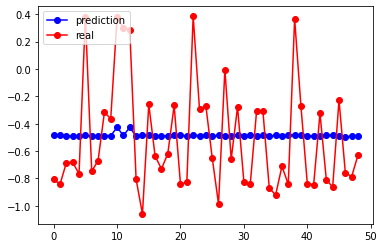

In [21]:
from matplotlib import pyplot as plt 

x = range(len(preds))

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(x, preds, c='b', marker="o", label='prediction')
ax1.plot(x, Y_test, c='r', marker="o", label='real')
plt.legend(loc='upper left');
plt.show()